In [99]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns

import numpy as np
import pandas as pd

     sl.no  subject_info  start_record    std_rr   skew_rr  kurtosis_rr  \
0        1             1           500  1.881491 -0.121626    -0.543563   
1        2             1          1000  2.120083  0.369155    -0.081984   
2        3             1          1500  1.928669  0.109448    -0.200209   
3        4             1          2000  1.995346  0.279244     0.122804   
4        5             1          2500  1.743821  0.191071    -0.171165   
..     ...           ...           ...       ...       ...          ...   
295   1585            21          3000  0.944144  0.076665    -1.121714   
296   1599             3           500  0.658362  0.307812    -0.489053   
297   1600             3          1000  0.607450  0.493292    -0.299997   
298   1601             3          1500  0.624757  0.459366    -0.175512   
299   1602             3          2000  0.631902  0.540088     0.069031   

      mean_rr   std_acc  skew_acc  kurtosis_acc  ...  mean_gra   std_alt  \
0    4.329645  0.789562

Text(0.5, 1.0, 'Raw data after removing kurtosis ')

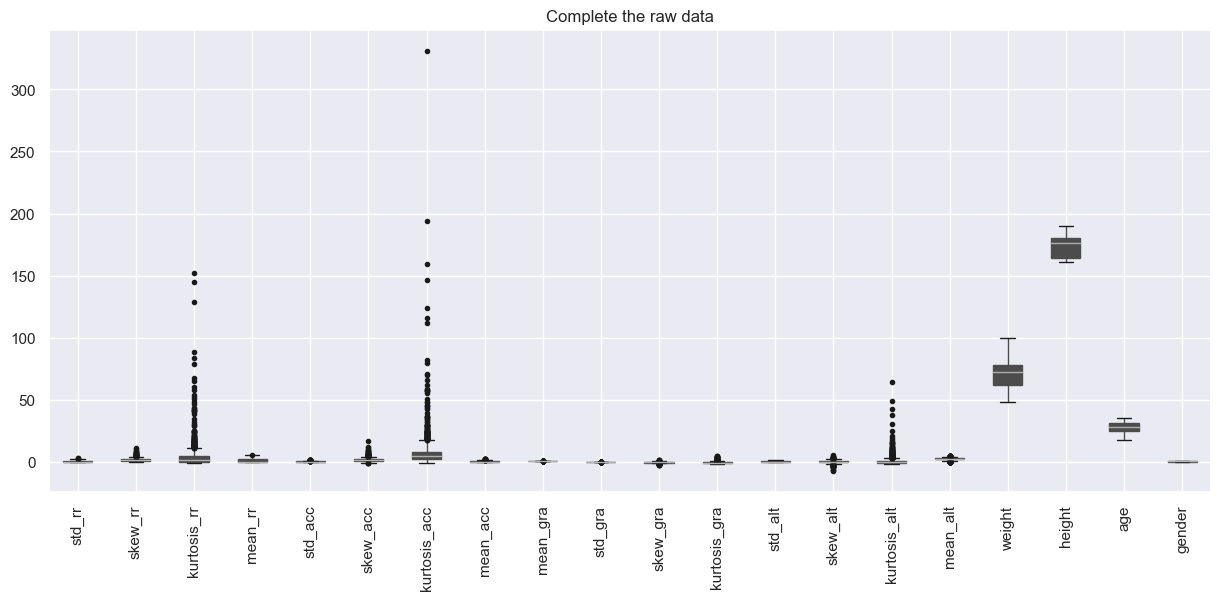

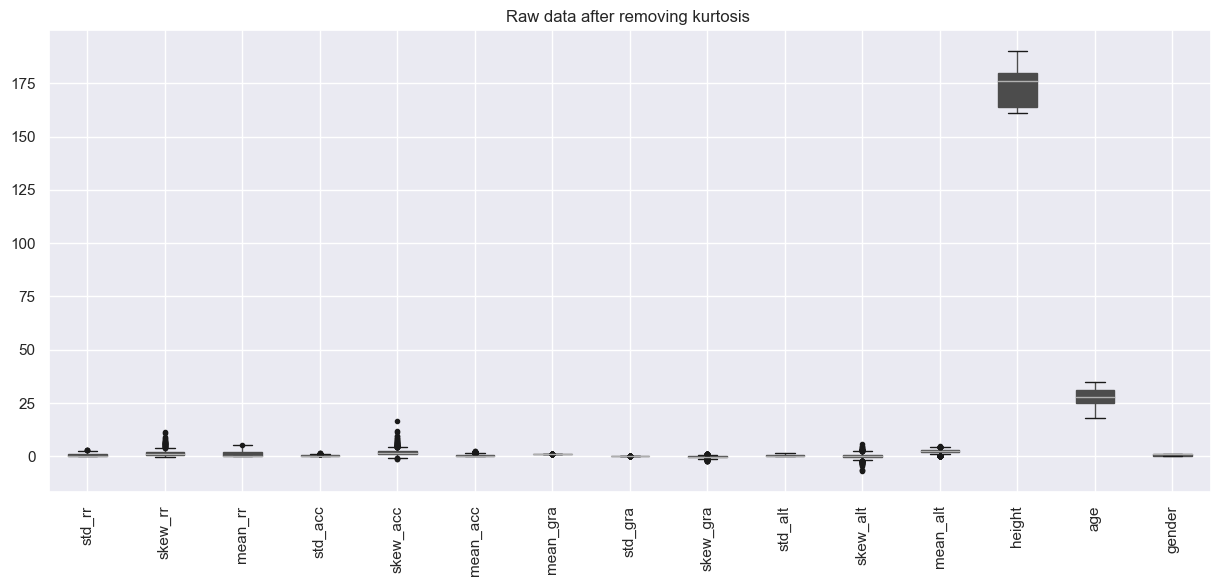

In [100]:
# Get the data for model and text 
df_model= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='Model')

#print(df_model)

df_test= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='test_1_3_16_21')
print(df_test)

# set the X (as features for model) and y (target data - task information )

X_modelData = pd.DataFrame(df_model,columns=['std_rr','skew_rr','kurtosis_rr','mean_rr','std_acc','skew_acc','kurtosis_acc','mean_acc','mean_gra','std_gra','skew_gra','kurtosis_gra', 'std_alt', 'skew_alt', 'kurtosis_alt', 'mean_alt', 'weight', 'height', 'age', 'gender'])

# ploting to visulaize Outliers column-wise
plt.subplots(figsize=(15,6))
X_modelData.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title('Complete the raw data')

X_modelData

X_modelData = pd.DataFrame(df_model,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt', 'height', 'age', 'gender'])
# ploting to visulaize Outliers column-wise
plt.subplots(figsize=(15,6))
X_modelData.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title('Raw data after removing kurtosis ')


,std_rr,skew_rr,mean_rr,std_acc,skew_acc,mean_acc,mean_gra,std_gra,skew_gra,std_alt,skew_alt,mean_alt,height,age,gender
0,0.578915,0.081851,0.642418,0.526945,0.142747,0.608927,0.981115,0.045000,0.602560,0.192730,0.605993,0.343867,0.103448,0.764706,0.0
1,0.622628,0.094770,0.623627,0.513436,0.148038,0.616119,0.992793,0.027304,0.488532,0.174013,0.605905,0.322439,0.103448,0.764706,0.0
2,0.610091,0.080985,0.634717,0.521617,0.131376,0.610933,0.981159,0.063549,0.746872,0.162263,0.600677,0.308464,0.103448,0.764706,0.0
3,0.569428,0.074684,0.634489,0.607353,0.148436,0.647942,0.959001,0.064764,0.553841,0.141932,0.610661,0.284882,0.103448,0.764706,0.0
4,0.665747,0.118166,0.635388,0.597927,0.175833,0.570097,0.918022,0.159336,0.842132,0.481202,0.435471,0.609598,0.103448,0.764706,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,0.169923,0.120597,0.208111,0.109261,0.166538,0.125904,0.917454,0.085297,0.618306,0.443031,0.490476,0.593612,0.000000,0.352941,0.0
1322,0.375353,0.070854,0.437224,0.212995,0.157501,0.230099,0.981941,0.055610,0.694895,0.551185,0.473448,0.623969,1.000000,0.823529,1.0
1323,0.354725,0.088923,0.414791,0.221451,0.168971,0.213361,0.978883,0.078066,0.478673,0.639386,0.521313,0.543909,1.000000,0.823529,1.0
1324,0.356012,0.070108,0.418455,0.209686,0.163049,0.215751,0.980998,0.064424,0.467153,0.734530,0.561188,0.511572,1.000000,0.823529,1.0


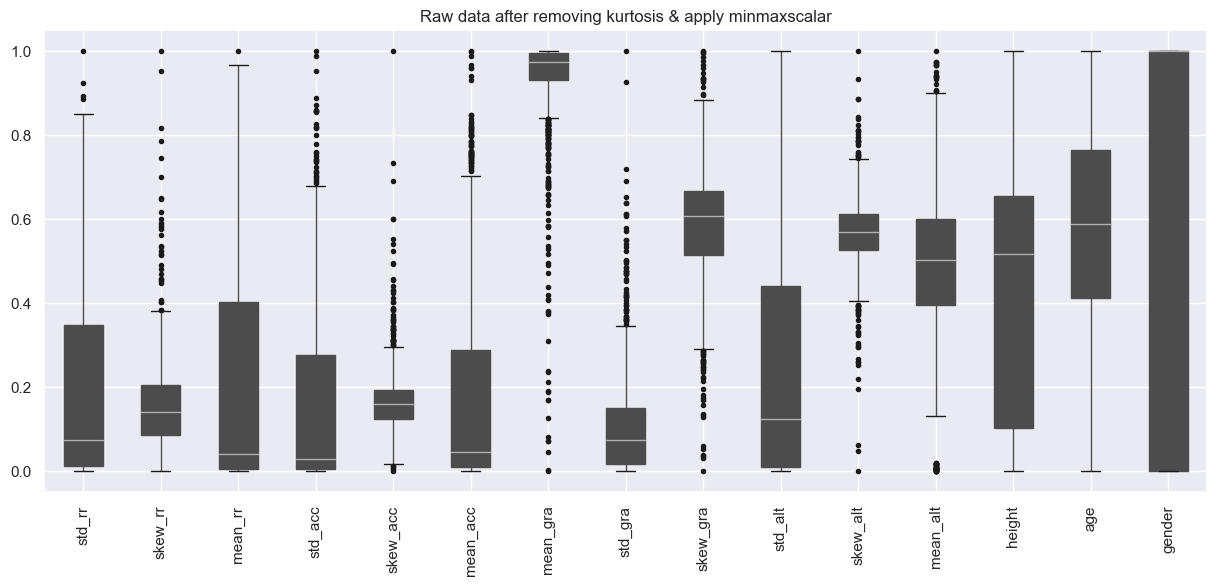

In [101]:
X_modelData = pd.DataFrame(df_model,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt', 'height', 'age', 'gender'])
#
# preprocessing of the all the data is performed 

from sklearn.preprocessing import StandardScaler    # 
std_scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler       # get the data in range of 0 to 1
mmscaler = MinMaxScaler()

X_modelData_scaled = mmscaler.fit_transform(X_modelData)
X_testData_scaled = mmscaler.fit_transform(X_testData)                          # check the heading of the test data 
 

X_modelData = pd.DataFrame(X_modelData_scaled,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt', 'height', 'age', 'gender'])
# 
 # ploting to visulaize Outliers column-wise
plt.subplots(figsize=(15,6))
X_modelData.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title('Raw data after removing kurtosis & apply minmaxscalar')

X_modelData

,std_rr,skew_rr,mean_rr,std_acc,skew_acc,mean_acc,mean_gra,std_gra,skew_gra,std_alt,skew_alt,mean_alt,height,age,gender
0,1.932869,-0.765957,1.836055,1.859978,-0.304359,1.995664,0.359192,-0.509952,0.112402,-0.167236,0.447946,-0.780714,-1.258492,0.680008,-1.185974
1,2.148557,-0.641047,1.756320,1.791574,-0.234379,2.028872,0.457502,-0.661148,-0.762312,-0.241269,0.446890,-0.901515,-1.258492,0.680008,-1.185974
2,2.086698,-0.774330,1.803381,1.832999,-0.454768,2.004925,0.359560,-0.351470,1.219424,-0.287743,0.383502,-0.980296,-1.258492,0.680008,-1.185974
3,1.886059,-0.835261,1.802411,2.267104,-0.229119,2.175815,0.173017,-0.341093,-0.261325,-0.368155,0.504550,-1.113244,-1.258492,0.680008,-1.185974
4,2.361317,-0.414833,1.806227,2.219377,0.133276,1.816369,-0.171958,0.466925,1.950166,0.973743,-1.619381,0.717358,-1.258492,0.680008,-1.185974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,-0.085189,-0.391331,-0.006842,-0.254883,0.010334,-0.234687,-0.176743,-0.165663,0.233190,0.822769,-0.952520,0.627241,-1.618449,-1.025433,-1.185974
1322,0.928446,-0.872294,0.965353,0.270352,-0.109209,0.246433,0.366141,-0.419304,0.820704,1.250546,-1.158959,0.798380,1.861135,0.923643,0.843189
1323,0.826664,-0.697578,0.870162,0.313171,0.042506,0.169146,0.340396,-0.227442,-0.837936,1.599403,-0.578664,0.347038,1.861135,0.923643,0.843189
1324,0.833017,-0.879505,0.885713,0.253598,-0.035821,0.180181,0.358204,-0.343997,-0.926310,1.975723,-0.095239,0.164733,1.861135,0.923643,0.843189


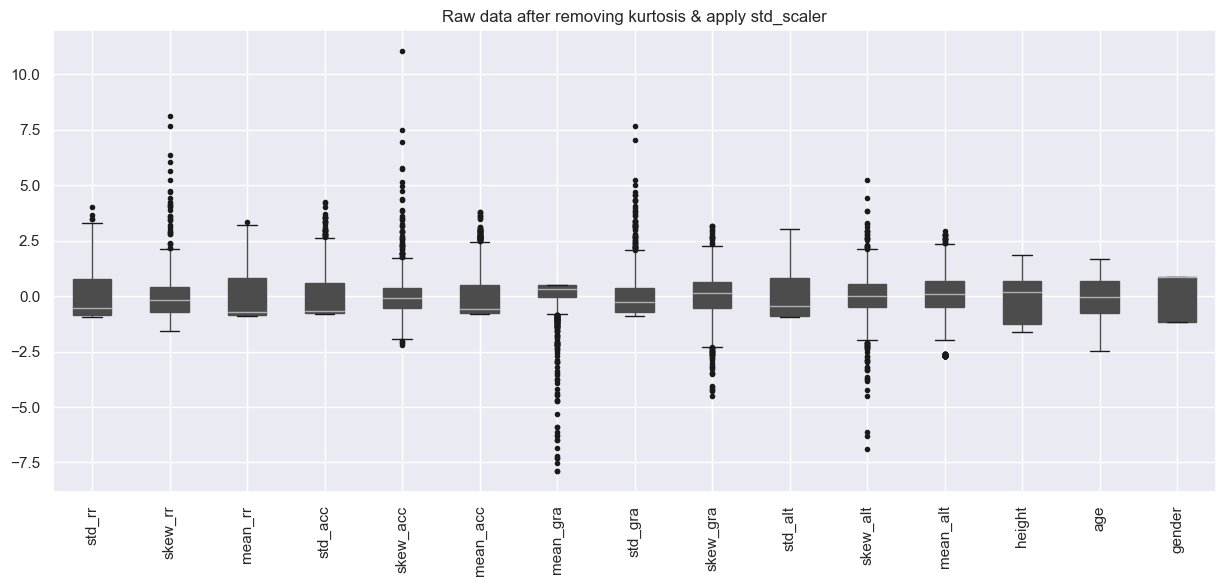

In [102]:
X_modelData = pd.DataFrame(df_model,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt', 'height', 'age', 'gender'])

# preprocessing of the all the data is performed 

from sklearn.preprocessing import StandardScaler    # 
std_scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler       # get the data in range of 0 to 1
mmscaler = MinMaxScaler()

X_modelData_scaled = std_scaler.fit_transform(X_modelData)
X_testData_scaled = std_scaler.fit_transform(X_testData)                          # check the heading of the test data 
 

X_modelData = pd.DataFrame(X_modelData_scaled,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt', 'height', 'age', 'gender'])
# 
 # ploting to visulaize Outliers column-wise
plt.subplots(figsize=(15,6))
X_modelData.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title('Raw data after removing kurtosis & apply std_scaler')

X_modelData

,std_rr,skew_rr,mean_rr,std_acc,skew_acc,mean_acc,mean_gra,std_gra,skew_gra,std_alt,skew_alt,mean_alt
0,1.932869,-0.765957,1.836055,1.859978,-0.304359,1.995664,0.359192,-0.509952,0.112402,-0.167236,0.447946,-0.780714
1,2.148557,-0.641047,1.756320,1.791574,-0.234379,2.028872,0.457502,-0.661148,-0.762312,-0.241269,0.446890,-0.901515
2,2.086698,-0.774330,1.803381,1.832999,-0.454768,2.004925,0.359560,-0.351470,1.219424,-0.287743,0.383502,-0.980296
3,1.886059,-0.835261,1.802411,2.267104,-0.229119,2.175815,0.173017,-0.341093,-0.261325,-0.368155,0.504550,-1.113244
4,2.361317,-0.414833,1.806227,2.219377,0.133276,1.816369,-0.171958,0.466925,1.950166,0.973743,-1.619381,0.717358
...,...,...,...,...,...,...,...,...,...,...,...,...
1321,-0.085189,-0.391331,-0.006842,-0.254883,0.010334,-0.234687,-0.176743,-0.165663,0.233190,0.822769,-0.952520,0.627241
1322,0.928446,-0.872294,0.965353,0.270352,-0.109209,0.246433,0.366141,-0.419304,0.820704,1.250546,-1.158959,0.798380
1323,0.826664,-0.697578,0.870162,0.313171,0.042506,0.169146,0.340396,-0.227442,-0.837936,1.599403,-0.578664,0.347038
1324,0.833017,-0.879505,0.885713,0.253598,-0.035821,0.180181,0.358204,-0.343997,-0.926310,1.975723,-0.095239,0.164733


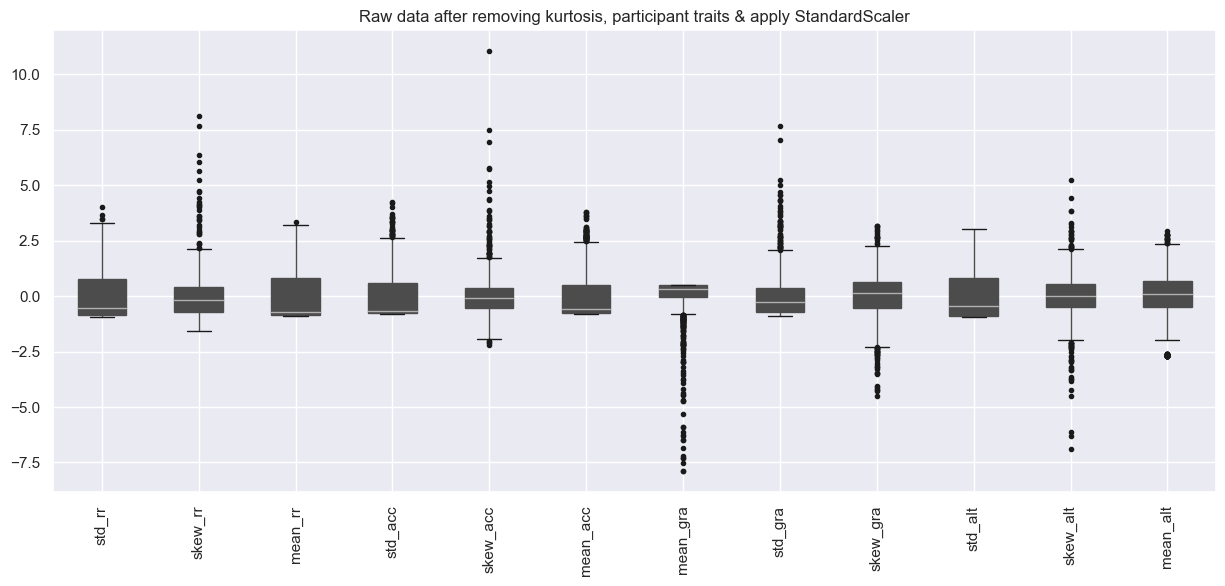

In [103]:
X_modelData = pd.DataFrame(df_model,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt'])

# preprocessing of the all the data is performed 

from sklearn.preprocessing import StandardScaler    # 
std_scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler       # get the data in range of 0 to 1
mmscaler = MinMaxScaler()

X_modelData_scaled = std_scaler.fit_transform(X_modelData)
X_testData_scaled = std_scaler.fit_transform(X_testData)                          # check the heading of the test data 
 

X_modelData = pd.DataFrame(X_modelData_scaled,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt'])
# 
 # ploting to visulaize Outliers column-wise
plt.subplots(figsize=(15,6))
X_modelData.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title('Raw data after removing kurtosis, participant traits & apply StandardScaler')

X_modelData

In [104]:

y_model= pd.DataFrame(df_model,columns=['task_info'])

X_testData = pd.DataFrame(df_test,columns=['std_rr','skew_rr','kurtosis_rr','mean_rr','std_acc','skew_acc','kurtosis_acc','mean_acc','mean_gra','std_gra','skew_gra','kurtosis_gra', 'std_alt', 'skew_alt', 'kurtosis_alt', 'mean_alt', 'weight', 'height', 'age', 'gender'])
y_test= pd.DataFrame(df_test,columns=['task_info'])

#data_features=['std_rr','skew_rr','kurtosis_rr','mean_rr','std_acc','skew_acc','kurtosis_acc','mean_acc','mean_gra','std_gra','skew_gra','kurtosis_gra', 'std_alt', 'skew_alt', 'kurtosis_alt', 'mean_alt', 'weight', 'height', 'age', 'gender']
data_features=columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt', 'height', 'age', 'gender']

In [105]:

# Data for modelling 
X=X_modelData_scaled
y=y_model

# data for prediction/testing
#       y_test
#       X_testData_scaled

# printing all the data 
#print('X_modelData',X_modelData)
#print('y_model',y_model)
#print('X_testData_scaled',X_testData_scaled)
#print('y_test',y_test)


# Know about the features 

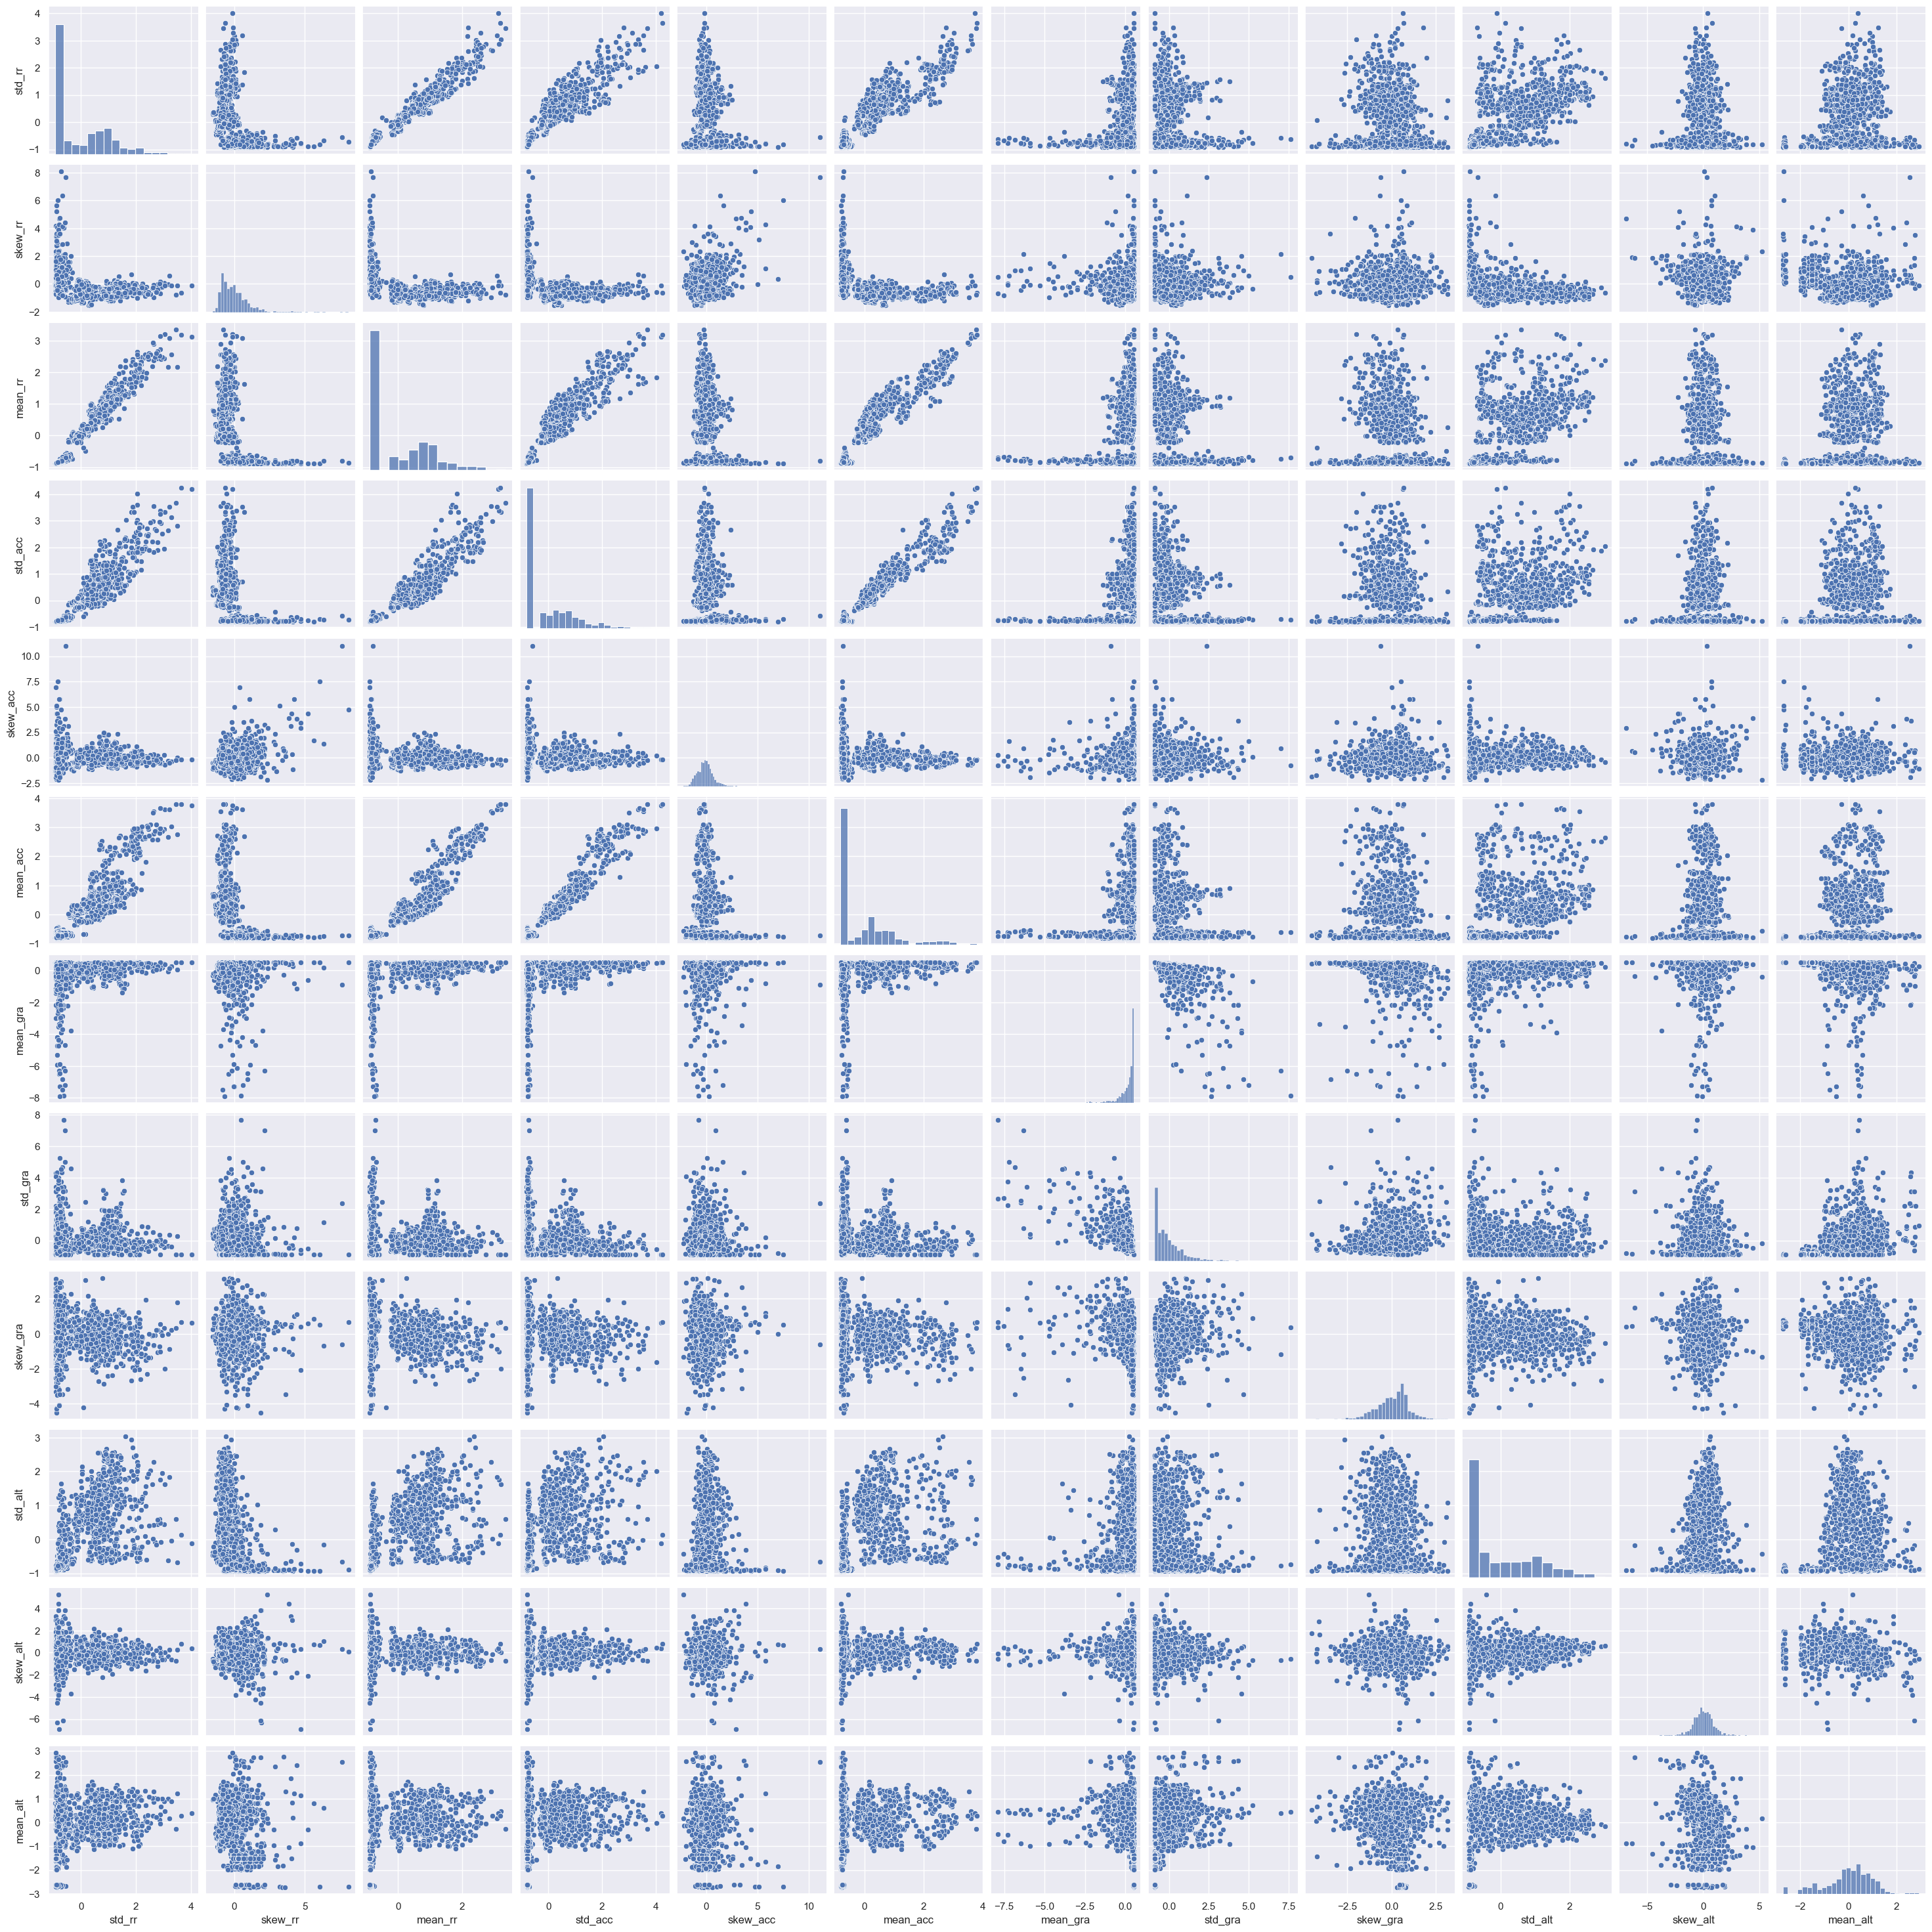

In [106]:
sns.pairplot(X_modelData)

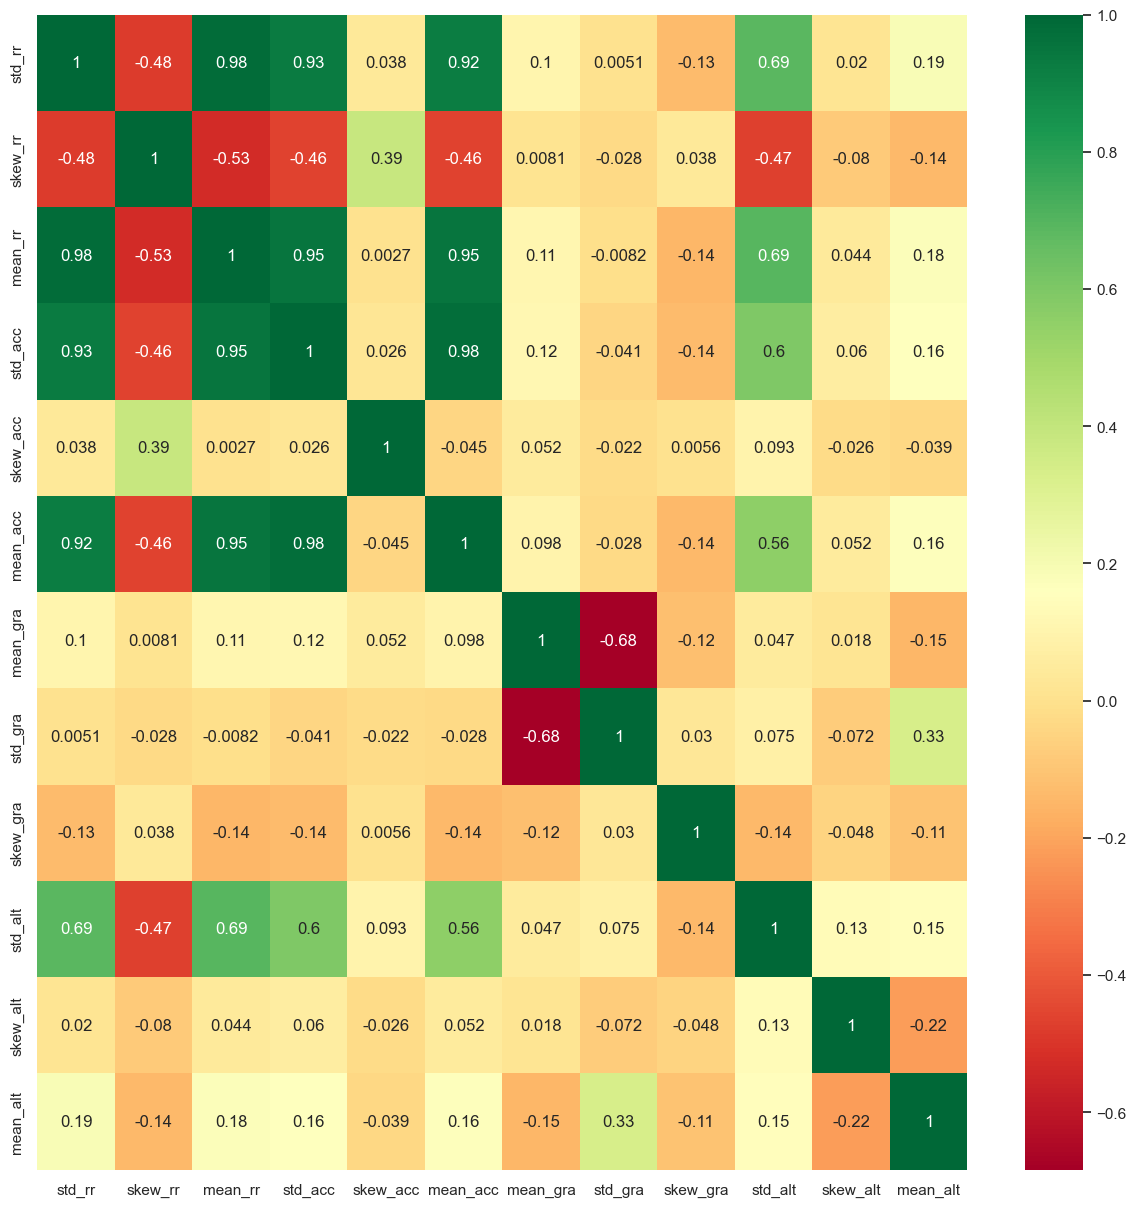

In [107]:
plt.figure(figsize=(15,15))
p=sns.heatmap(X_modelData.corr(), annot=True,cmap='RdYlGn')